# Inferencia Bayesiana

In [ ]:
#| code-fold: true

import arviz as az
from ipywidgets import interact
import ipywidgets as ipyw
import matplotlib.pyplot as plt
import numpy as np
import preliz as pz


ModuleNotFoundError: No module named 'ipywidgets'

In [ ]:

!pip install 


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 517.6/517.6 kB 5.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 108.8/108.8 kB 10.9 MB/s eta 0:00:00


In [ ]:
#| code-fold: true

az.style.use('arviz-doc')

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')


# </font> **<font color="Teal"> ¬°Un poco de contexto hist√≥rico!**

El mundo de la Estad√≠stica Bayesiana debe su nombre a Thomas Bayes (1702-1761) un ministro presbiteriano, y matem√°tico aficionado, quien deriv√≥ por primera vez lo que ahora conocemos como el **Teorema de Bayes**, el cual fue publicado (postumanente) en 1763. Sin embargo una de las primeras personas en realmente desarrollar m√©todos Bayesianos, fue Pierre-Simon Laplace (1749-1827), por lo que tal vez ser√≠a un poco m√°s correcto hablar de _Estad√≠stica Laplaciana_ y no Bayesiana.


Hay dos ideas centrales que hacen que un m√©todo sea Bayesiano:


* Toda cantidad desconocida es modelada utilizando una distribuci√≥n de probabilidad de alg√∫n tipo.
* El teorema de Bayes es usado para **actualizar** dicha distribuci√≥n a la luz de los datos.


En el universo Bayesiano las cantidades conocidas son consideradas fijas y usualmente les llamamos **datos**. Por el contrario toda cantidad desconocida es considerada como una variable aleatoria y es considerada un **par√°metros** dentro de un modelo Bayesiano.

Los m√©todos Bayesianos se utilizan generalmente como herramientas de an√°lisis de datos derivados de los principios de la inferencia bayesiana.

Adem√°s de interpretarlos formalmente como medio de inducci√≥n, los m√©todos bayesianos nos proporcionan, en nuestros an√°lisis:
* estimaciones de par√°metros con buenas propiedades estad√≠sticas  indicar
* descripciones precisas de los datos observados
* predicciones de datos faltantes y pron√≥sticos/predicciones
* un marco computacional para la estimaci√≥n, selecci√≥n y validaci√≥n de modelos!

### Introducimos el Teorema de Bayes

El Teorema de Bayes es una consecuencia directa de la regla del producto. Recordemos, que podemos escribir una probabilidad conjunta mediante Regla de multiplicaci√≥n, de cualquiera de las siguientes maneras:

\begin{align}
p(\theta, Y) = p(\theta \mid Y)\; p(Y) \\
p(\theta, Y) = p(Y \mid \theta)\; p(\theta)
\end{align}
Dado que los dos t√©rminos a la derecha de las igualdades determinan la misma probabilidad, podemos igualarlos entre s√≠:

$$
p(\theta \mid Y) \; p(Y) = p(Y \mid \theta)\; p(\theta)
$$

Reordenando, llegamos a la siguiente igualdad:

$$
p(\theta \mid Y) = \frac{p(Y \mid \theta) p(\theta)}{p(Y)}
$$

El cual tambi√©n suele ser escrito de la siguiente forma:

<font color="#00b894">$$
\overbrace{p(\theta \mid Y)}^{\text{posterior}} = \frac{\overbrace{p(Y \mid \theta)}^{\text{likelihood}} \overbrace{p(\theta)}^{\text{prior}}}{\underbrace{\int_{\Theta} p(Y \mid \theta) p(\theta) \text{d}\theta}_{\text{likelihood marginal}}}
$$</font>



Definamos los tres conceptos principales que tendremos en cuenta a la hora de trabajar con m√©todos bayesianos:

**_Distribuci√≥n a priori_ p(Œ∏)**: es la forma de introducir conocimiento previo sobre los valores que pueden tomar los par√°metros.

En situaciones con escasa informaci√≥n previa, se suelen usar _a prioris_ que asignan igual probabilidad a todos los valores de los par√°metros, otras veces se puede elegir _a prioris_ que restrinjan los valores de los par√°metros a rangos razonables, algo que se conoce como regularizaci√≥n, por ejemplo solo valores positivos.

Muchas veces contamos con informaci√≥n mucho m√°s precisa como medidas experimentales previas o l√≠mites impuesto por alguna teor√≠a.En casos con informaci√≥n previa s√≥lida, se emplean estos a prioris que reflejan expl√≠citamente ese conocimiento.

**_likelihood_ p(Y‚à£Œ∏)** es la forma de incluir nuestros datos en el an√°lisis. Es una expresi√≥n matem√°tica que especifica la plausibilidad de los datos. El _likelihood_ es central tanto en estad√≠stica Bayesiana como en estad√≠stica no-Bayesiana. A medida que la cantidad de datos aumenta el _likelihood_ tiene cada vez m√°s peso en los resultados, esto explica el porqu√© a veces los resultados de la estad√≠stica Bayesiana y frecuentista coinciden cuando la muestra es _grande_.

**_Distribuci√≥n a posteriori_ p(Œ∏‚à£Y)** : describe la probabilidad de los par√°metros Œ∏ despu√©s de haber incorporado la informaci√≥n de los datos mediante _likelihood_ y un _a priori_. Se lo suele pensar como la versi√≥n actualizada del _a priori_ tras observar los datos. ¬°De hecho un _a posteriori_ puede ser un _a priori_ de un an√°lisis a futuro!


  

**_likelihood marginal_ p(Y)** (tambi√©n llamado _evidencia_) es el likelihood promediado sobre todas los posibles hip√≥tesis (o conjunto de par√°metros) $\theta$, esto es equivalente a $p(Y)$. En general, la _evidencia_ puede ser vista como una simple constante de normalizaci√≥n que en la mayor√≠a de los problemas pr√°cticos puede (y suele) omitirse. Por lo que el teorema de Bayes suele expresarse como:</font>

$$
p(\theta \mid Y) \propto p(Y \mid \theta) p(\theta)
$$





*Resumiendo...*

El teorema de Bayes establece la relaci√≥n entre estos elementos:

$$
p(\theta \mid Y) \propto p(Y \mid \theta) p(\theta)
$$


Es decir, la distribuci√≥n a posteriori de Œ∏ dado los datos
Y es proporcional al producto entre la verosimilitud y la distribuci√≥n a priori.

               ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
               ‚îÇ  Prior     ‚îÇ
               ‚îÇ P(Œ∏)       ‚îÇ   ‚Üê Creencia inicial sobre el par√°metro Œ∏
               ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
                    ‚îÇ
                    ‚ñº
         ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
         ‚îÇ Likelihood       ‚îÇ
         ‚îÇ P(Y | Œ∏)     ‚îÇ   ‚Üê Qu√© tan probables son los datos Y para cada valor de Œ∏
         ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
              ‚îÇ
              ‚ñº
    ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
    ‚îÇ Producto:              ‚îÇ
    ‚îÇ P(Œ∏) * P(Y | Œ∏)    ‚îÇ   ‚Üê Numerador del teorema de Bayes
    ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
             ‚îÇ
             ‚ñº
    ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
    ‚îÇ Marginal likelihood      ‚îÇ
    ‚îÇ P(Y) = ‚à´ P(Y|Œ∏) P(Œ∏)dŒ∏  ‚îÇ   ‚Üê Normaliza la distribuci√≥n posterior
    ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
                  ‚îÇ
                  ‚ñº
         ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
         ‚îÇ Posterior            ‚îÇ
         ‚îÇ P(Œ∏ | Y)         ‚îÇ  ‚Üê Nueva creencia sobre Œ∏ despu√©s de ver los datos
         ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò



### El _a posteriori_ como √∫nico estimador

El _a posteriori_ representa todo lo que sabemos de un problema, dado un modelo y un conjunto de datos. Y por lo tanto cualquier cantidad que nos interese sobre el problema puede deducirse a partir de √©l. T√≠picamente esto toma la forma de integrales como la siguiente.

$$
J = \int \varphi(\theta) \ \ p(\theta \mid Y) d\theta
$$

Por ejemplo, para calcular la media de $\theta$ deber√≠amos reemplazar $\varphi(\theta)$, por $\theta$:

$$
\bar \theta = \int \theta \ \ p(\theta \mid Y) d\theta
$$

Esto no es m√°s que la definici√≥n de un promedio pesado, donde cada valor de $\theta$ es _pesado_ seg√∫n la probabilidad asignada por el _a posteriori_.

En la pr√°ctica, y al usar m√©todos computacionales como los usados en este curso, estas integrales pueden aproximarse usando sumas.

### Estad√≠stica Bayesiana en tres pasos

El teorema de Bayes es la √∫nica y central herramienta utilizada para construir un estimador en estad√≠stica Bayesiana, por lo que conceptualmente la estad√≠stica Bayesiana resulta muy simple. Seg√∫n George Box y [Andrew Gelman et al. (2013)](https://www.crcpress.com/Bayesian-Data-Analysis-Third-Edition/Gelman-Carlin-Stern-Dunson-Vehtari-Rubin/p/book/9781439840955) la estad√≠stica Bayesiana se reduce a tres pasos:

1. **Crear un modelo probabil√≠stico**. Los modelos probabil√≠sticos son _historias_ que dan cuenta de como se generan los datos observados (o por observar). Los modelos se expresan usando distribuciones de probabilidad.

2. **Condicionar el modelo a los datos observados a fin de obtener el _a posteriori_**. Usando el teorema de Bayes se actualizan las probabilidades asignadas _a priori_ de acuerdo a los datos observados obteni√©ndose las probabilidades _a posteriori_.

3. **Criticar el ajuste del modelo generado a los datos y evaluar las consecuencias del modelo**. Se puede demostrar que dada la informaci√≥n previa y los datos observados no existe otro mecanismo capaz de generar una _mejor_ inferencia que la estad√≠stica Bayesiana. Esto parece maravilloso, pero hay un problema, s√≥lo es cierto si se asumen que los datos y el modelo son correctos. En la pr√°ctica, los datos pueden contener errores y los modelos son _a duras penas_ aproximaciones de fen√≥menos _reales_. Por lo tanto es necesario realizar varias evaluaciones, incluyendo si las predicciones generadas por el modelo se ajustan a los datos observados, si las conclusiones obtenidas tienen sentido dado el marco conceptual en el que uno trabaja, la sensibilidad de los resultados a los _detalles_ del modelo (sobre todo a detalles para los cuales no tenemos demasiada informaci√≥n),  etc. Adem√°s, es posible que realizar inferencia Bayesiana sea demasiado costosa en la pr√°ctica por lo que sea conveniente realizar aproximaciones.

-----------------------------------------------------------------------------------------------

## <font color="#00b894">Inferencia Bayesiana para un solo par√°metro:</font>
En la pr√°ctica la mayor√≠a de los modelos tendr√°n m√°s de un par√°metro, pero empecemos con un modelo con un solo par√°metro.

###  El problema de la moneda

Las monedas son objetos cotidianos que permiten introducir ideas complejas de forma accesible. Adem√°s, su comportamiento puede modelarse de manera sencilla, lo que las convierte en una herramienta √∫til para ilustrar problemas m√°s generales.

De hecho, muchos fen√≥menos reales pueden interpretarse bajo un esquema equivalente al de lanzar una moneda, siempre que el resultado sea binario: √©xito/fracaso, s√≠/no, enfermo/sano, spam/no-spam, entre otros.

En esencia, el modelo que presentaremos ‚Äîejemplificado aqu√≠ con monedas‚Äî es aplicable a cualquier situaci√≥n en la que los datos observados adopten solo dos valores mutuamente excluyentes. Dado que estos valores son nominales y existen √∫nicamente dos posibilidades, se lo conoce como modelo binomial.

En el siguiente ejemplo trataremos de determinar el grado en que una moneda est√° sesgada. En general cuando se habla de **sesgo** se hace referencia a la desviaci√≥n de alg√∫n valor (por ejemplo, igual proporci√≥n de caras y cecas), pero aqu√≠ usaremos el termino **sesgo** de forma m√°s general:
 * <font color="orange">Diremos que el **sesgo** es un valor en el intervalo [0, 1], siendo 0 para una moneda que siempre cae ceca y 1 para una moneda que siempre cae cara y lo representaremos con la variable $\theta$. A fin de cuantificar $\theta$ arrojaremos una moneda al aire repetidas veces, por practicidad arrojaremos la moneda de forma computacional (¬°pero nada nos impide hacerlo manualmente!). Llevaremos registro del resultado en la variable $y$. Siendo $y$ la cantidad de caras obtenidas en un experimento.

Habiendo definido nuestro problema debemos expresarlo en t√©rminos del Teorema de Bayes,

$$
p(\theta \mid Y) \propto  p(Y \mid  \theta) p(\theta)
$$

Donde, como dijimos $\theta = 1$ quiere decir 100% cara y $\theta = 0$ 100% ceca.



**Ahora s√≥lo restar reemplazar los dos t√©rminos a la derecha de la igualdad, el _a priori_ y el _likelihood_,  por distribuciones de probabilidad _adecuadas_ y luego multiplicarlas para obtener el t√©rmino a la izquierda, el _a posteriori_. Como es la primera vez que haremos √©sto, lo haremos paso a paso y anal√≠ticamente. En el pr√≥ximo cap√≠tulo veremos c√≥mo hacerlo computacionalmente:**

### Primer paso: definir el _a priori_

El _a priori_ lo modelaremos usando una distribuci√≥n Beta con par√°metros $\alpha$ y $\beta$, que es una distribuci√≥n muy usada en estad√≠stica Bayesiana. La funci√≥n de densidad de esta distribuci√≥n es:

$$
p(\theta)= \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\, \theta^{\alpha-1}(1-\theta)^{\beta-1}
$$

El primer t√©rmino es una constante de normalizaci√≥n. Por suerte para nuestro problema nos basta con establecer una proporcionalidad, por lo que podemos simplificar esta expresi√≥n y escribir la distribuci√≥n Beta de la siguiente forma.

$$
p(\theta) \propto  \theta^{\alpha-1}(1-\theta)^{\beta-1}
$$

Hay varias razones para usar una distribuci√≥n Beta para este y otros problemas:

<font color="orange">* La distribuci√≥n Beta var√≠a entre 0 y 1, de igual forma que lo hace $\theta$ en nuestro modelo.</font>

<font color="orange">* Esta distribuci√≥n combinada con la que elegiremos como _likelihood_ (ver m√°s adelante), nos permitir√° resolver el problema de forma anal√≠tica.</font>

<font color="orange">* Es una distribuci√≥n vers√°til para expresar distintas situaciones.</font>

Respecto al √∫ltimo punto, veamos un ejemplo:

 Supongamos que el experimento de la moneda es realizado por tres personas.

 1. La primera dice que no sabe nada de la moneda por lo tanto _a priori_ todos los valores de $\theta$ son igualmente probables.
 2. La segunda persona desconf√≠a de la moneda, ya que sospecha que es una moneda trucada, por lo tanto considera que est√° sesgada, pero no sabe para cual de las dos opciones.
 3. Por √∫ltimo, la tercer persona asegura que lo m√°s probable es que $\theta$ tome un valor alrededor de 0.5 ya que as√≠ lo indican experimentos previos y an√°lisis te√≥ricos sobre tiradas de monedas. Todas estas situaciones pueden ser modeladas por la distribuci√≥n Beta, como se ve a continuaci√≥n.

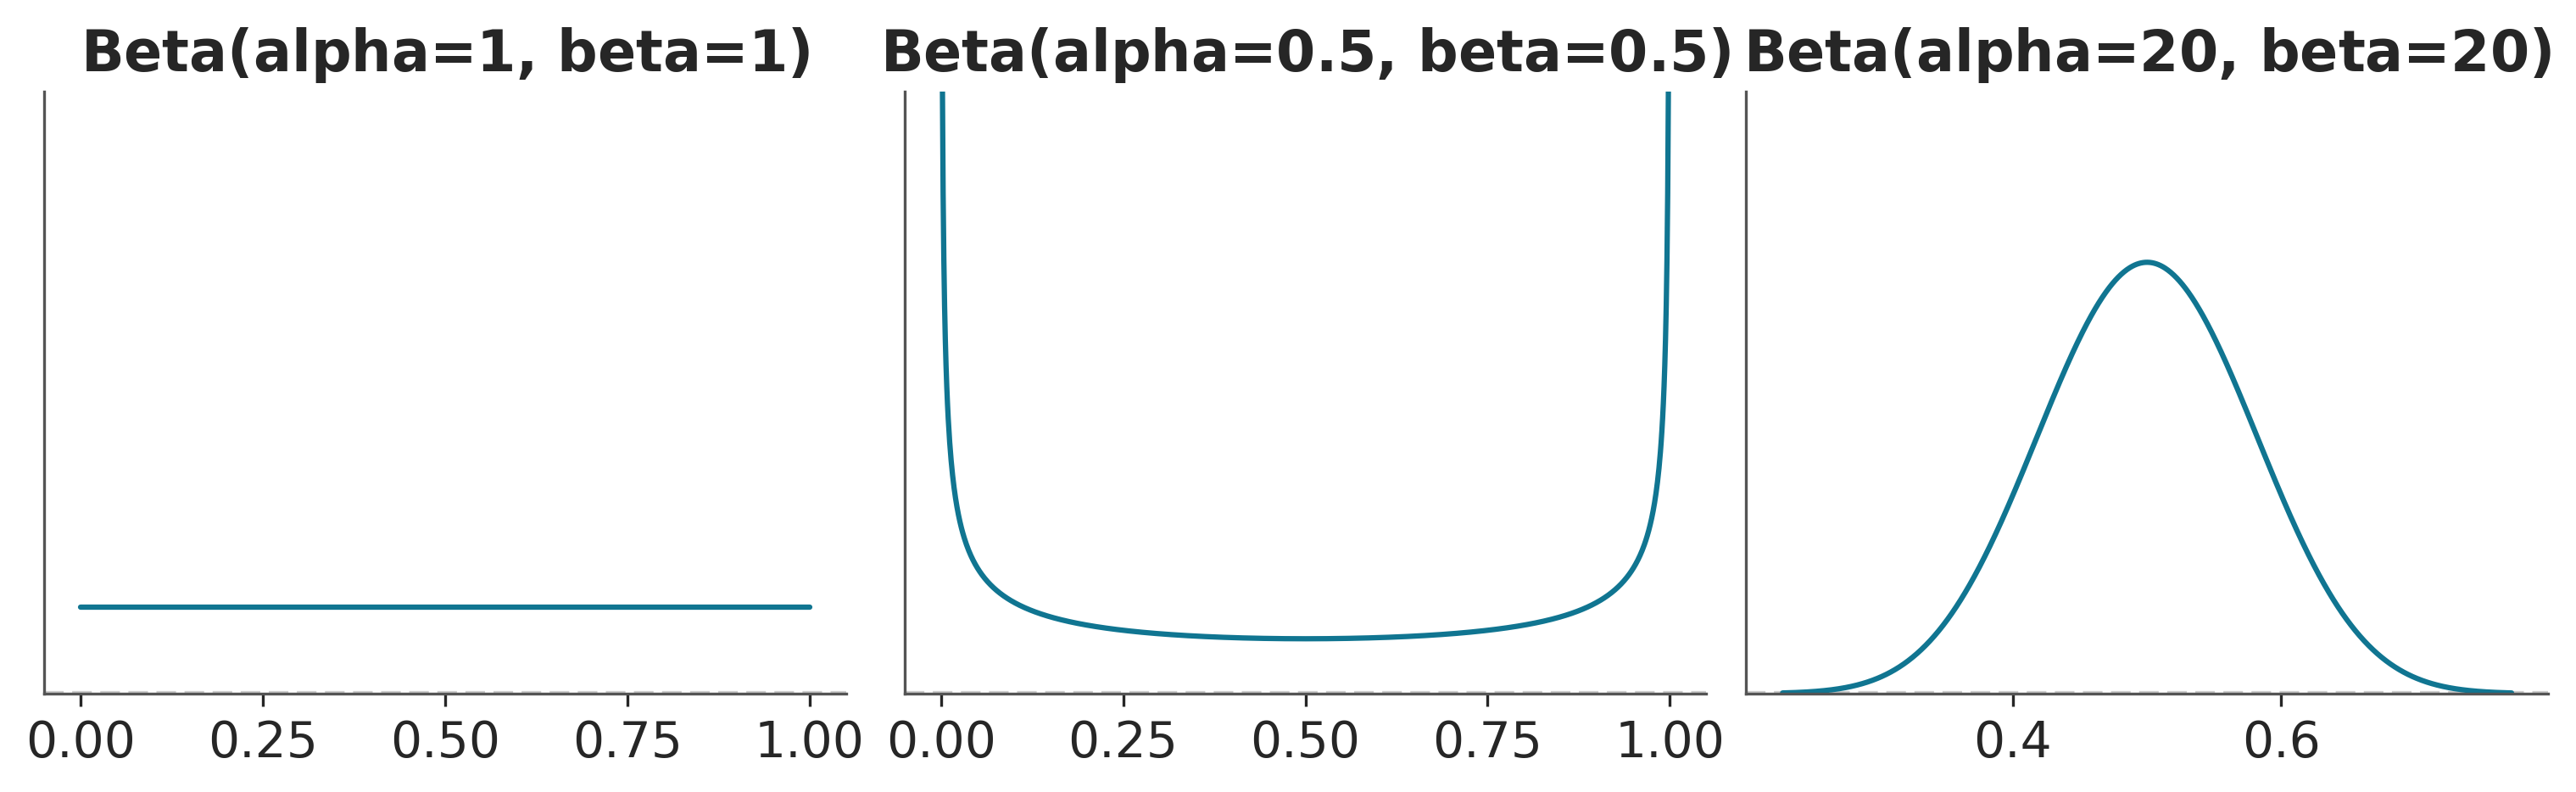

In [ ]:
_, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True)

params = [(1, 1), (0.5, 0.5), (20, 20)] # definmos los tres priors

for (a, b), ax  in zip(params, axes):
    ax = pz.Beta(a, b).plot_pdf(ax=ax, legend="title")
    ax.set_ylim(0, 7)

Qu√© observamos?:

Primera imagen: distribuci√≥n uniforme ‚Üí ignorancia total sobre el caso

Segunda imagen: La curva en U ‚Üí sospecha de sesgo.

Tercera imagen: La campana ajustada en 0.5 ‚Üí confianza en una moneda justa.

In [ ]:
#pz.Beta().plot_interactive(xy_lim=(None, None, None, 10))
pz.Beta().plot_interactive(xy_lim=(None, None, None, 10), figsize=(3,1))

interactive(children=(FloatSlider(value=2.0, description='alpha (0, inf)', max=12.0, min=2.220446049250313e-16‚Ä¶

**¬øQu√© sucede a medida que vamos cambiando los par√°metros $\alpha$ y $\beta$?**


--------------------------------------------------------------------------------------

###  Segundo paso: definir el _likelihood_

Habiendo definido el _a priori_ veamos ahora el likelihood. Asumiendo que el resultado obtenido al arrojar una moneda no influye en el resultado de posteriores experimentos (es decir los experimentos son independientes entre s√≠) es razonable utilizar como likelihood la distribuci√≥n binomial:

* El modelo binomial describe la cantidad de √©xitos en $N$ ensayos independientes.

* En nuestro caso:
 √âxito = "el resultado de arrojar la moneda es cara"

con Probabilidad de √©xito = $Œ∏$

* Tomamos el n√∫mero de ensayos = $N$

Entonces la variable aleatoria para nuestro experimento es $Y‚àºBin(N,Œ∏)$


Es decir, $Œ∏$ es la probabilidad de que salga cara en un lanzamiento, y la binomial justamente usa esa probabilidad como par√°metro.

Dicho de otra forma:

Condicional en Œ∏, las tiradas de moneda son independientes.

Entonces la probabilidad de observar exactamente $y$ caras en $N$ lanzamientos es

$$
p(y \mid \theta) = \frac{N!}{y!(N-y)!} \theta^y (1 - \theta)^{N‚àíy}
$$

Donde $N$ es la cantidad total de experimentos (monedas arrojadas al aire) e $y$ es la cantidad de caras obtenidas.

 A los fines pr√°cticos podr√≠amos simplificar la igualdad anterior y convertirla en una proporcionalidad, eliminando el t√©rmino $\frac{N!}{y!(N-y)!}$ ya que ese t√©rmino no depende de $\theta$ que es lo que nos interesa averiguar. Por lo que podr√≠amos establecer que:

$$
p(y \mid \theta) \propto \theta^y (1 - \theta)^{N‚àíy}
$$

La elecci√≥n de esta distribuci√≥n para modelar nuestro problema es razonable ya que $\theta$ es la chance de obtener una cara al arrojar una moneda y ese hecho ha ocurrido $y$ veces, de la misma forma $1-\theta$ es la chance de obtener ceca lo cual ha sido observado $N-y$ veces.

In [ ]:
pz.Binomial(1, 0.5).plot_interactive(pointinterval=False, xy_lim=(None, None, None, 1), figsize=(3,1))

interactive(children=(IntSlider(value=1, description='n (0, inf)', max=11, style=SliderStyle(description_width‚Ä¶

Observemos que si consideramos una Bin(1, 0.5) ‚Üí es decir el caso equilibrado.



### Tercer paso: obtener el _a posteriori_


Se puede demostrar que siempre que usemos como _prior_ una funci√≥n Beta y como _likelihood_ una distribuci√≥n binomial obtendremos como resultado una distribuci√≥n _a posteriori_, la cual ser√° una Beta con los siguientes par√°metros:

$$
p(\theta \mid y) = \operatorname{Beta}(\alpha_{a priori} + y, \beta_{a priori} + N - y)
$$

Veamos de donde surge este resultado, seg√∫n el teorema de Bayes la distribuci√≥n _a posteriori_ es el producto del _likelihood_ y la distribuci√≥n _a priori_.

$$
p(\theta \mid y) \propto p(y \mid \theta) p(\theta)
$$

Por lo tanto, en nuestro caso tendremos que:

$$
p(\theta \mid y) \propto \underbrace{{\color{gray}{\frac{N!}{y!(N-y)!}}} \theta^y (1 - \theta)^{N‚àíy}}_{\text{likelihood}} \underbrace{{\color{gray}{\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}}}\, \theta^{\alpha-1}(1-\theta)^{\beta-1}}_{\text{prior}}
$$

Si omitimos las constantes de normalizando del likelihood y prior, obtenemos que el _a posteriori_ es:

$$
p(\theta \mid y) \propto \theta^{\alpha-1+y}(1-\theta)^{\beta-1+N‚àíy}
$$

Podemos ver que la expresi√≥n a la derecha de la proporcionalidad tiene la misma forma funcional (sin considerar la constante de proporcionalidad) que una distribuci√≥n Beta. Como la distribuci√≥n a posterior debe intergrar a 1 entonces podemos escribir.

$$
p(\theta \mid y) = \frac{\Gamma(\alpha + y +\beta + N -y)}{\Gamma(\alpha + y)\Gamma(\beta + N - y)}\, \theta^{\alpha-1+y}(1-\theta)^{\beta-1+n-y}
$$

Lo que es equivalente a una distribuci√≥n Beta con par√°metros $\alpha_{\text{a posteriori}} = \alpha_{\text{a priori}} + y \quad \beta_{\text{a posteriori}} = \beta_{\text{a priori}} + N - y$.

Se dice que un a priori es conjugado con respecto a un determinado likelihood cuando la forma funcional de la distribuci√≥n a priori y la de la distribuci√≥n a posteriori coinciden.

Hist√≥ricamente, gran parte de los problemas en estad√≠stica bayesiana se abordaron utilizando a prioris conjugados, ya que estos garantizan la tratabilidad matem√°tica del modelo. En otras palabras, permiten obtener una expresi√≥n anal√≠tica exacta para la distribuci√≥n a posteriori.


<font color="orange">En el cap√≠tulo presentaremos t√©cnicas computacionales modernas que hacen posible calcular la distribuci√≥n a posteriori incluso sin recurrir a a prioris conjugados. Estos avances han sido clave en el resurgimiento y la expansi√≥n de la estad√≠stica bayesiana en las √∫ltimas d√©cadas.</font>

----------------------------------------------------------------------------------------------

##  **¬øC√≥mo representamos los modelos Bayesianos?**

Para representar resumidamente todo lo que desarrollamos hasta ahora en nuestro modelo, y en general en cualquier modelo de estad√≠stica Bayesiana (y en probabilidad en general) usamos la siguiente notaci√≥n:
$$
\begin{align}
\theta \sim & \operatorname{Beta}(\alpha, \beta) \\
Y \sim & \operatorname{Bin}(n=1, p=\theta)
\end{align}
$$

En el enfoque bayesiano modelamos la incertidumbre sobre
Œ∏ mediante una distribuci√≥n a priori, en este caso una Beta(Œ±,Œ≤).



---------------------------------------------------------------------------------------------------

# <font color="teal">Armemos un ejemplo con observaciones conocidas</font>
¬øC√≥mo podemos conseguir los datos para nuestra aplicaci√≥n del modelo anterior?:

Trabajaremos con un ejemplo con datos sint√©ticos, obtienidos mediante un generador de n√∫meros (pseudo)aleatorios.

**Ustedes pueden obtener datos reales arrojando una moneda y anotando los resultados observados, como les dej√© de tarea** üòÉ

### Calculamos el _a posteriori_

En el pr√≥ximo cap√≠tulo veremos c√≥mo usar m√©todos computacionales para computar un _a posteriori_ sin necesidad de derivarlo anal√≠ticamente. Esto es lo que haremos para resolver el resto de los problemas del curso.

Ahora, y dado que ya nos tomamos el trabajo de derivar anal√≠ticamente la expresi√≥n para el _a posteriori_, vamos a usar esa expresi√≥n.



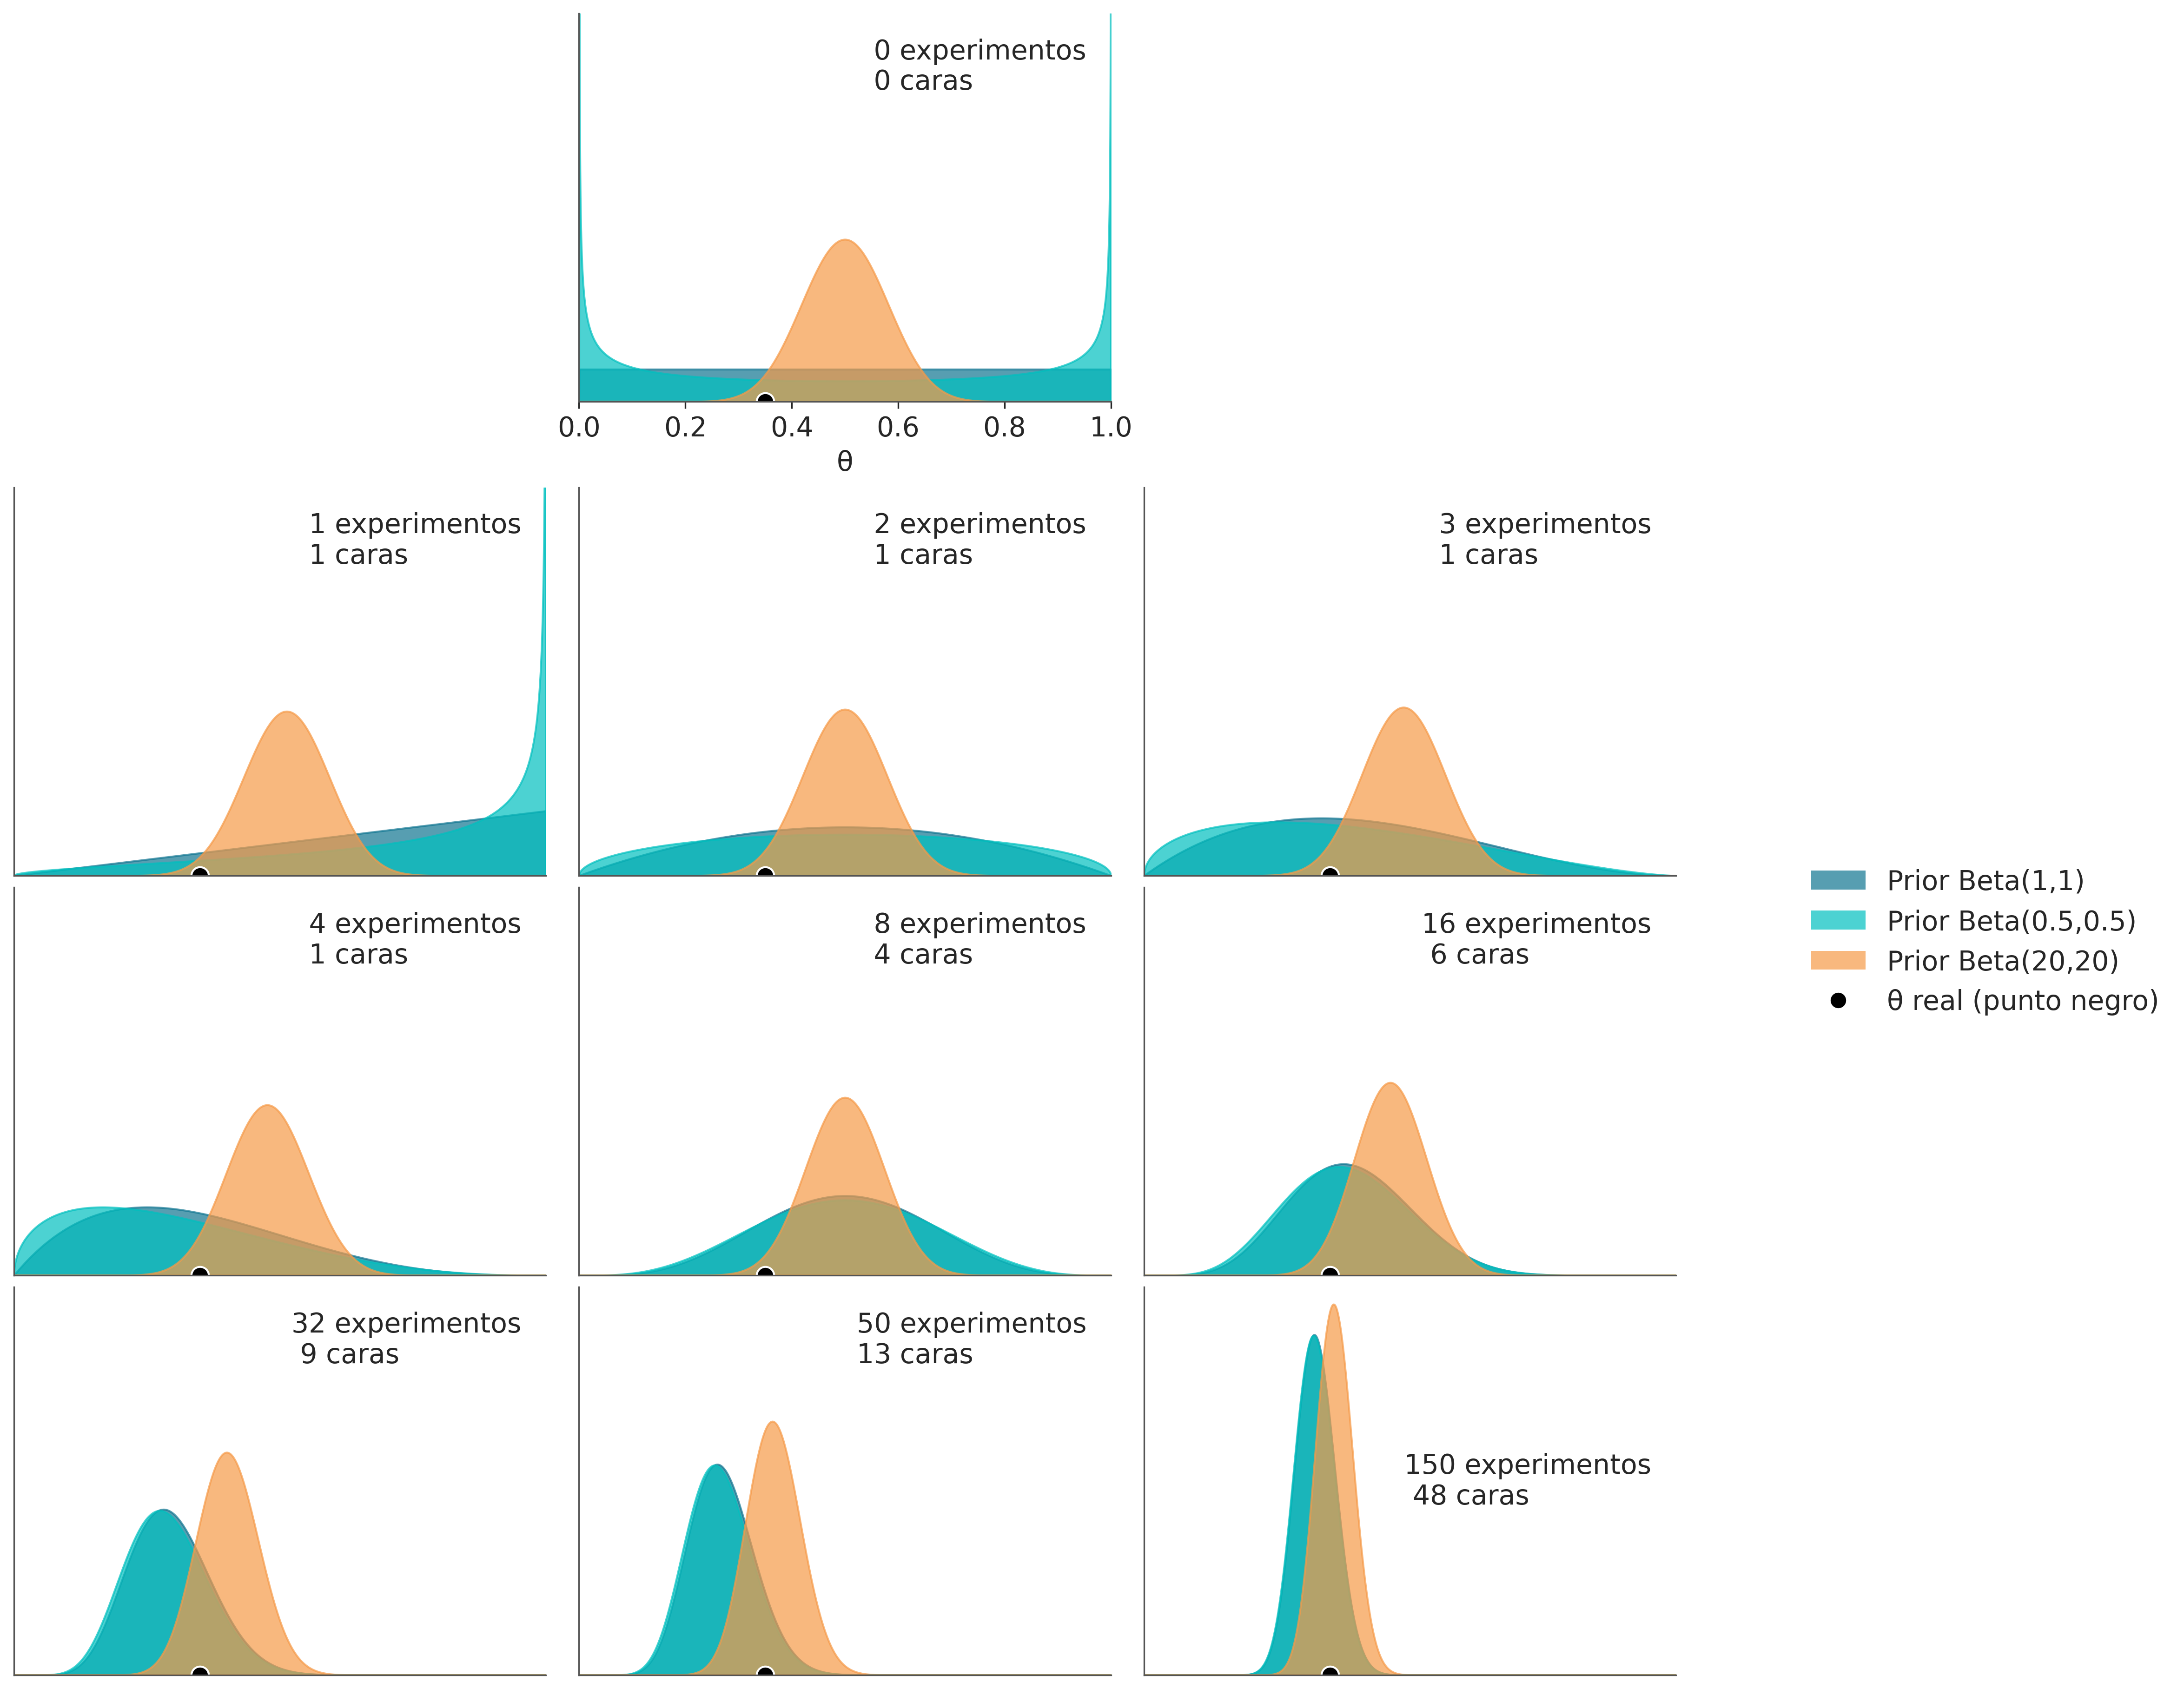

In [ ]:
plt.figure(figsize=(12, 12))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

beta_params = [(1, 1), (0.5, 0.5), (20, 20)]
dist = pz.Beta
x = np.linspace(0, 1, 2000)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('Œ∏')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = data[idx]
    for i, (a_prior, b_prior) in enumerate(beta_params):
        posterior = dist(a_prior + y, b_prior + N - y).pdf(x)
        plt.fill_between(x, 0, posterior, alpha=0.7, color=f'C{i}')

    plt.plot(theta_real, 0, ms=9, marker='o', mec='w', mfc='k')
    plt.plot(0, 0, label=f'{N:4d} experimentos\n{y:4d} caras', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.yticks([])
    plt.legend()  # mantiene las etiquetas invisibles para cada subplot

# Leyenda
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [
    Patch(facecolor='C0', alpha=0.7, label='Prior Beta(1,1)'),
    Patch(facecolor='C1', alpha=0.7, label='Prior Beta(0.5,0.5)'),
    Patch(facecolor='C2', alpha=0.7, label='Prior Beta(20,20)'),
    Line2D([0], [0], marker='o', color='w', label='Œ∏ real (punto negro)', markerfacecolor='k', markersize=9)
]

plt.gcf().legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.3, 0.5))

plt.show()


*Observaci√≥n para poner en pr√°ctica a la hora de hacer pruebas:*

se puede ver que la mayor√≠a de las lineas se encargan de dibujar los resultados y no de calcularlos. El c√°lculo del _a posteriori_ ocurre en la l√≠nea 20. Cada una de estas lineas computa el _a posteriori_ para cada uno de los _a prioris_ que vimos antes. El c√°lculo es simple, tan solo se computa el valor del _a posteriori_ (usando la funci√≥n _pdf_ de la distribuci√≥n Beta provista por PreliZ) para 2000 puntos igualmente espaciados entre 0 y 1 (linea 9). El loop que empieza en la linea 11 se debe a que exploraremos c√≥mo cambian las distribuciones _a posteriori_ para distinta cantidad de datos (*n_intentos*). Con un c√≠rculo negro de contorno blanco se indica el valor real de $\theta$, valor que por supuesto es desconocido en una situaci√≥n real, pero conocido para m√≠, ya que los datos son sint√©ticos.

## Analizando los resultados ¬ø Qu√© nos muestran estos gr√°ficos?



La primer figura del panel muestra los *a priori*, nuestra estimaci√≥n de $\theta$ dado que no hemos realizado ning√∫n experimento. Las sucesivas nueve figuras muestran las distribuciones *a posteriori* y se indica la cantidad de experimentos y de caras obtenidas. Adem√°s se puede ver un c√≠rculo negro de contorno blanco en 0.35, la cual representa el valor verdadero de $\theta$. Por supuesto que en problemas reales este valor es desconocido.

Este ejemplo es realmente ilustrativo en varios aspectos.

* El resultado de un an√°lisis Bayesiano NO es un solo valor, si no una distribuci√≥n (_a posteriori_) de los valores plausibles de los par√°metros (dado los datos y el modelo).
* La dispersi√≥n o ancho de las curvas es una medida de la incertidumbre sobre los valores.
* El valor m√°s probable viene dado por la moda de la distribuci√≥n (el _pico_ de la distribuci√≥n).
* A√∫n cuando $\frac{2}{1} = \frac{8}{4}$ son num√©ricamente iguales tenemos menor incertidumbre en un resultado cuando el n√∫mero de experimentos es mayor.
* Dada una cantidad _suficiente_ de datos los resultados tienden a converger sin importar el _a priori_ usado.
* La rapidez con la que los resultados convergen var√≠a. En este ejemplo las curvas azul y turquesa parecen converger con tan solo 8 experimentos, pero se necesitan m√°s de 50 experimentos para que las tres curvas se muestren similares. A√∫n con 150 experimentos se observan ligeras diferencias.
* Partiendo de los _a priori_ uniforme (azul) o _sesgado_ (turquesa) y habiendo realizado un solo experimento y observado una sola cara, lo m√°s razonable es pensar que estamos frente a una moneda con dos caras!
* La situaci√≥n cambia dr√°sticamente al ver por primera vez una moneda caer ceca. Ahora lo m√°s probable (dado cualquiera de los tres *a prioris*) es inferir que $\theta=0.5$. Los valores de $\theta$ exactamente 0 o 1 se vuelven imposibles.
* El _a priori_ naranja es m√°s informativo que los otros dos (la distribuci√≥n esta m√°s concentrada), por ello se requiere de un n√∫mero mas grande de experimentos para "moverlo".
* El _a priori_ uniforme (azul) es lo que se conoce como no informativo. El resultado de un an√°lisis Bayesiano usando un _a priori_ no-informativos en general coinciden con los resultados de an√°lisis frecuentistas (en este caso el valor esperado de $\theta = \frac{y}{N}$).

**Ejercitaci√≥n:**

1. Cambiar los valores de N o y para ver c√≥mo cambia la concentraci√≥n y el pico del posterior.

2. Cambiar los par√°metros del prior para ver c√≥mo influye la creencia previa:

deben poder observar que:
Prior d√©bil ‚Üí curva m√°s flexible y abierta
Prior fuerte ‚Üí curva m√°s concentrada alrededor de 0.5, incluso si los datos son pocos

3. Comparar distintos N para entender qu√© sucede a medida que los datos aumentan (spoiler: todos los priors ‚Äúconvergen‚Äù hacia el mismo posterior).

---------------------------------------------------------------------------------------

## **Ejercicios del cap√≠tulo 1**

1. El estad√≠stico Bruno de Finetti declar√≥ que "Las probabilidades no existen". C√≥mo se vincula este enunciado con el modelo BetaBinomial que hemos visto?

1. Edwin Jaynes, f√≠sico, declar√≥ que la teor√≠a de probabilidad es la l√≥gica de la ciencia. Discut√≠ este enunciado.


1. Us√° pz.Beta().plot_interactive() para explorar distintas combinaciones de par√°metros de la distribuci√≥n Beta. Cu√°l es el efecto de los par√°metros $\alpha$ y $\beta$?

1. Interpret√° los par√°metros de una distribuci√≥n Beta, $\alpha$ y $\beta$ en t√©rminos de su PDF (probability density function). Analiz√° solo el caso de $\alpha >= 1$ y $\beta >= 1$

1. La media de la distribuci√≥n Beta es $\frac{\alpha}{\alpha+\beta}$. Cu√°l es la media de la distribuci√≥n a posteriori para un modelo Beta-Binomial, con prior Beta(2, 5) y 10 experimentos con 6 caras?

1. La varianza de la distribuci√≥n Beta es $\frac{\alpha \beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$. Cu√°l es la varianza de la distribuci√≥n a posteriori para un modelo Beta-Binomial, con prior Beta(2, 5) y 10 experimentos con 6 caras?

1. Contrast√° los resultados de los puntos anteriores usando la funci√≥n `mean` y `var` de la distribuci√≥n Beta de PreliZ.

1. PreliZ tiene una funci√≥n llamada [maxent](https://preliz.readthedocs.io/en/latest/api_reference.html#preliz.unidimensional.maxent). Explic√° que hace.

1. Conocimiento experto indica que un par√°metro debe ser positivo y que el 90% puede estar entre 2 y 20. Us√° maxent para definir ese prior.

1. Conocimiento experto indica que un par√°metro debe ser positivo con media 6 y 90% puede estar entre 2 y 20. Us√° maxent para definir ese prior.

1. Us√° la siguiente funci√≥n para explorar diversas combinaciones de _priors_ y _likelihoods_. Enunci√° las conclusiones que consideres m√°s relevantes.

Gu√≠a:

In [1]:
def a_posteriori_grilla(grilla=10, a=1, b=1, caras=6, tiradas=9):
    grid = np.linspace(0, 1, grilla)
    prior = pz.Beta(a, b).pdf(grid)
    likelihood = pz.Binomial(n=tiradas, p=grid).pdf(caras)
    posterior = likelihood * prior
    posterior /= posterior.sum()
    _, ax = plt.subplots(1, 3, sharex=True, figsize=(16, 4))
    ax[0].set_title('caras = {}\ntiradas = {}'.format(caras, tiradas))
    for i, (e, e_n) in enumerate(zip([prior, likelihood, posterior], ['a priori', 'likelihood', 'a posteriori'])):
        ax[i].set_yticks([])
        ax[i].plot(grid, e, 'o-', label=e_n)
        ax[i].legend(fontsize=14)


interact(a_posteriori_grilla, grilla=ipyw.IntSlider(min=2, max=100, step=1, value=15), a=ipyw.FloatSlider(min=1, max=7, step=1, value=1), b=ipyw.FloatSlider(
    min=1, max=7, step=1, value=1), caras=ipyw.IntSlider(min=0, max=20, step=1, value=6), tiradas=ipyw.IntSlider(min=0, max=20, step=1, value=9));

NameError: name 'interact' is not defined